In [1]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
ds = datasets.load_iris()

In [3]:
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import pandas as pd
df = pd.DataFrame(ds.data,columns=ds.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#描述統計量
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

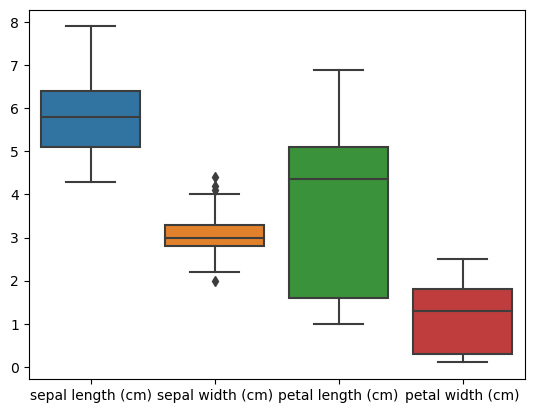

In [9]:
#箱形圖
import seaborn as sns
sns.boxplot(data=df)

In [10]:
#是否有遺失值
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

<Axes: ylabel='count'>

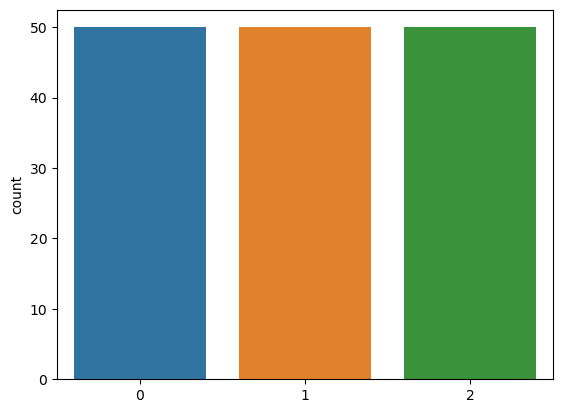

In [11]:
#y各類別資料筆數
import seaborn as sns
sns.countplot(x=y)

In [12]:
#pandas函數統計各類別資料筆數
pd.Series(y).value_counts()

0    50
1    50
2    50
Name: count, dtype: int64

In [13]:
#指定X，並轉為Numpy陣列
X = df.values
#資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [14]:
scaler = preprocessing.StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [16]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [17]:
y_pred = clf.predict(X_test_std)
y_pred

array([0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 2, 0, 0, 0, 1])

In [18]:
# 使用了 f-string 來格式化字串，並將變數 accuracy_score(y_test, y_pred) 的值插入到字串中。
# 在這個字串中，{} 中的部分代表要插入的變數，而 :.2f 則是一種格式化指令，表示將浮點數四捨五入到小數點後兩位。
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

93.33%


In [19]:
# 混淆矩陣
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0  6  2]
 [ 0  0  9]]


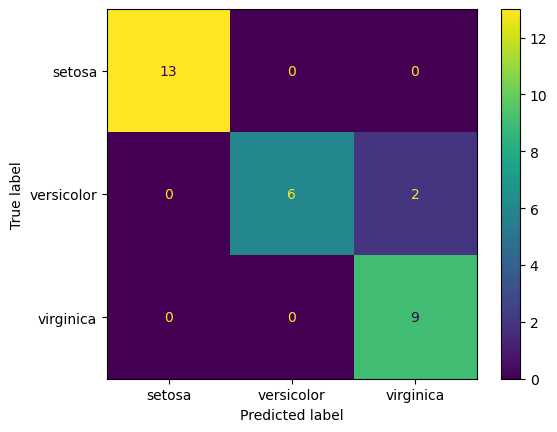

In [20]:
#使用混淆矩陣圖
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=ds.target_names)

disp.plot()
plt.show()

In [21]:
#儲存模型
import joblib

joblib.dump(clf, './data/model.joblib')
joblib.dump(scaler, './data/scaler.joblib');